<a href="https://colab.research.google.com/github/Abhinavpanjiyar1/Pytorch/blob/main/pytorch_simple_rnn_sine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

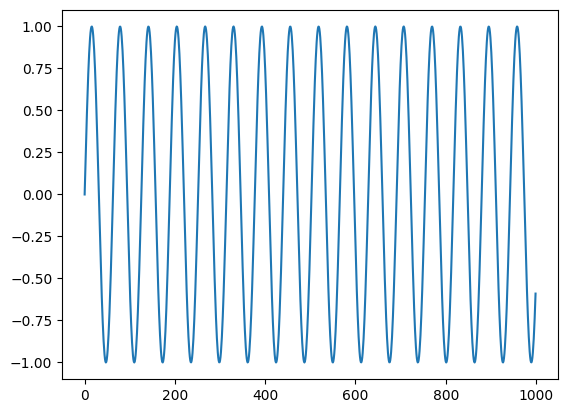

In [92]:
# make the original data
N =1000
series = np.sin(0.1*np.arange(N))

# plot it
plt.plot(series)
plt.show

In [93]:
# build the dataset
T=10
X =[]
Y=[]
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y =series[t+T]
  Y.append(y)

X =np.array(X).reshape(-1, T, 1)
Y= np.array(Y).reshape(-1, 1)
N =len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)


X.shape (990, 10, 1) Y.shape (990, 1)


In [94]:
# setup the device
device =torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cpu


In [95]:
# define simple RNN
class SimpleRNN(nn.Module):
  def __init__(self, n_inputs, n_hidden, n_rnnlayers, n_outputs):
    super(SimpleRNN, self).__init__()
    self.D = n_inputs
    self.M= n_hidden
    self.L= n_rnnlayers
    self.K = n_outputs



    self.rnn = nn.RNN(input_size = self.D,
                      hidden_size = self.M,
                      num_layers = self.K,
                      nonlinearity = 'relu',
                      batch_first = True
                      )
    self.fc = nn.Linear(self.M, self.K)

  def forward(self,X):
    # initial hidden states
    h0 =torch.zeros(self.L, X.size(0), self.M).to(device)

    # get rnn unit outputs
    out,_ =self.rnn(X, h0)

    # we only want h(T) at the final time step
    out = self.fc(out[:,-1, :])
    return out






In [96]:
# instantiate the model
model = SimpleRNN(n_inputs =1, n_hidden =5, n_rnnlayers =1,n_outputs=1)
model.to(device)

SimpleRNN(
  (rnn): RNN(1, 5, batch_first=True)
  (fc): Linear(in_features=5, out_features=1, bias=True)
)

In [97]:
#loss and optimizer
criterion =nn.MSELoss()
optimizer =torch.optim.Adam(model.parameters(), lr =0.1)


In [98]:
# make inputs and targets
X_train = torch.from_numpy(X[:-N//2].astype(np.float32))
y_train = torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test = torch.from_numpy(X[-N//2].astype(np.float32))
y_test =torch.from_numpy(Y[:-N//2].astype(np.float32))


In [99]:
X_train, y_train =X_train.to(device), y_train.to(device)
X_test, y_test= X_test.to(device), y_test.to(device)

In [100]:
# training
def full_gd(model,
            criterion,
            optimizer,
            X_train,
            y_train,
            X_test,
            y_test,
            epochs =200):
  # stuff to store
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range (epochs):
    optimizer.zero_grad()

    # forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # backward and optimize
    loss.backward()
    optimizer.step()

    # save losses
    train_losses[it] =loss.item()

    #test loss
    test_outputs = model(X_test.unsqueeze(0))
    test_loss = criterion(test_outputs, y_test.unsqueeze(0))
    test_losses[it] = test_loss.item()

    if(it +1) % 5 ==0:
      print(f"epochs:{it+1} /{epochs}, Train loss:{loss.item():.4f}, Test loss: {test_loss.item():.4f}")

  return train_losses, test_losses


In [101]:
train_losses , test_losses = full_gd(model,
                                     criterion,
                                     optimizer,
                                     X_train,
                                     y_train,
                                     X_test,
                                     y_test)

epochs:5 /200, Train loss:0.3181, Test loss: 0.5039
epochs:10 /200, Train loss:0.2487, Test loss: 0.5203
epochs:15 /200, Train loss:0.1549, Test loss: 0.5029
epochs:20 /200, Train loss:0.0953, Test loss: 0.5790
epochs:25 /200, Train loss:0.0528, Test loss: 0.5048
epochs:30 /200, Train loss:0.0277, Test loss: 0.5075
epochs:35 /200, Train loss:0.0117, Test loss: 0.5247
epochs:40 /200, Train loss:0.0115, Test loss: 0.5126
epochs:45 /200, Train loss:0.0081, Test loss: 0.5166


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 495, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epochs:50 /200, Train loss:0.0067, Test loss: 0.5163
epochs:55 /200, Train loss:0.0059, Test loss: 0.5165
epochs:60 /200, Train loss:0.0046, Test loss: 0.5218
epochs:65 /200, Train loss:0.0043, Test loss: 0.5228
epochs:70 /200, Train loss:0.0037, Test loss: 0.5217
epochs:75 /200, Train loss:0.0036, Test loss: 0.5256
epochs:80 /200, Train loss:0.0033, Test loss: 0.5232
epochs:85 /200, Train loss:0.0032, Test loss: 0.5287
epochs:90 /200, Train loss:0.0031, Test loss: 0.5247
epochs:95 /200, Train loss:0.0030, Test loss: 0.5289
epochs:100 /200, Train loss:0.0029, Test loss: 0.5275
epochs:105 /200, Train loss:0.0028, Test loss: 0.5289
epochs:110 /200, Train loss:0.0027, Test loss: 0.5294
epochs:115 /200, Train loss:0.0027, Test loss: 0.5293
epochs:120 /200, Train loss:0.0026, Test loss: 0.5307
epochs:125 /200, Train loss:0.0025, Test loss: 0.5303
epochs:130 /200, Train loss:0.0024, Test loss: 0.5311
epochs:135 /200, Train loss:0.0024, Test loss: 0.5316
epochs:140 /200, Train loss:0.0023, Te

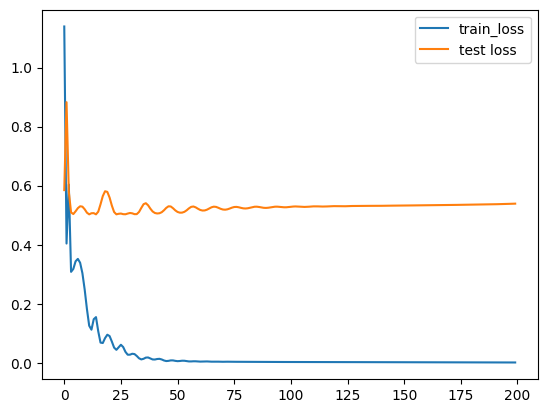

In [102]:
# plt the train loss and test loss per iteration
plt.plot(train_losses, label = "train_loss")
plt.plot(test_losses, label ="test loss")
plt.legend()
plt.show()

In [103]:
# wrong forecasting using true targets
validation_target =Y[-N//2:]
validation_predictions = []

# index of first validation input
i = 0

while i<len(X_test) and len(validation_target) > len(validation_predictions):
  input_ =X_test[i].reshape(1, 1, 1)
  p =model(input_)[0,0].item()
  i+=1

  #update the predictions list
  validation_predictions.append(p)


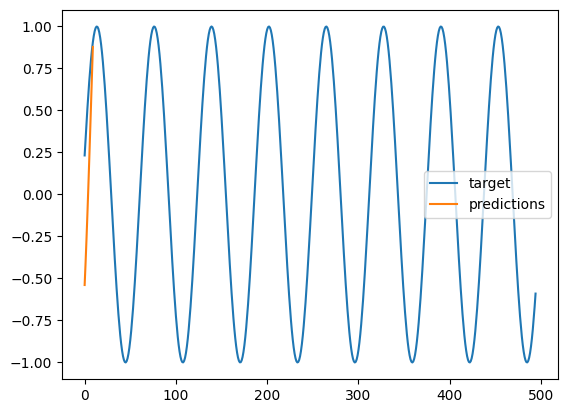

In [104]:
plt.plot(validation_target, label = 'target')
plt.plot(validation_predictions, label ='predictions')
plt.legend()
plt.show()


In [110]:
# forecast future values
validation_target =Y[-N//2:]
validation_predictions = []

#last train input
last_x =X_test[0].view(1, 1, 1)

while len(validation_predictions) < len(validation_target):
  input_ =last_x.reshape(1, 1, 1)
  p =model(input_)

  validation_predictions.append(p[0,0].item())

  # make the new input
  last_x = torch.cat((last_x[0, :, 1:], p), dim=1) # Concatenate along the third dimension
  last_x = last_x.view(1, 1, -1)

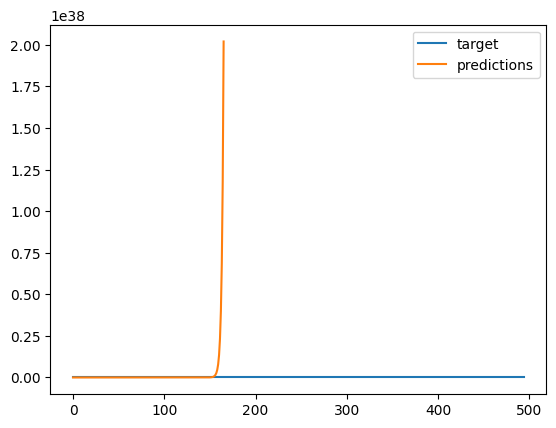

In [112]:
plt.plot(validation_target, label = 'target')
plt.plot(validation_predictions, label ='predictions')
plt.legend()

